In [37]:
import numpy as np
from datetime import datetime
from scipy.stats import bernoulli 
from scipy.stats import binom
import pandas as ps

Crear un experimento binomial

In [30]:
universo = ['cara','sello']

bernoulli.rvs(p=1/2)
#rvs = rabdom variable sample

universo[bernoulli.rvs(p=1/2)]

'cara'

In [31]:
bernoulli.rvs(p=1/2,size=10)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

Hacer una distribución binomial de las probabilidades

In [36]:
binom.rvs(p=1/2,n=5,size=100)

array([3, 3, 2, 3, 4, 2, 4, 0, 2, 5, 1, 4, 3, 3, 3, 3, 4, 3, 1, 4, 0, 5,
       3, 3, 4, 2, 4, 2, 2, 4, 2, 2, 1, 3, 3, 1, 1, 2, 2, 2, 2, 3, 0, 4,
       1, 3, 4, 4, 2, 1, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 4, 3, 2, 3, 1, 4,
       1, 4, 2, 1, 0, 2, 3, 4, 2, 2, 1, 3, 3, 2, 1, 4, 1, 1, 4, 3, 1, 3,
       4, 2, 2, 1, 3, 3, 4, 3, 3, 0, 2, 4])

In [42]:
pd.Series(binom.rvs(p=1/2,n=5,size=100)).value_counts()/100

2    0.31
3    0.27
1    0.20
4    0.16
5    0.04
0    0.02
dtype: float64

# Medias de tendencia central 

In [43]:
import numpy as np 
import scipy.stats

In [46]:
df_bicis = pd.read_csv('bicicletas-compartidas.csv')
df_bicis.head()

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [49]:
y = df_bicis['bicis-compartidas'].values

### Tendencias de centralización

In [50]:
np.mean(y)

1143.1016423567244

In [51]:
np.median(y)

844.0

Para saxar algunos tipos de medias, tengo que cambiar los valores nulos, porque hacen que el calculo sea nulo o indeterminado 

In [54]:
# donde y sea igual a 0 cambia a 1 , de lo contrario deja el valor de y 
y = np.where(y==0,1,y)

In [55]:
#Media geometrica
scipy.stats.mstats.gmean(y)

623.2472122430046

In [56]:
#Media armónica
scipy.stats.mstats.hmean(y)

241.65180305136826

In [77]:
#Moda

value , count = np.unique(y,return_counts=True)
# Con argmax encontramos la posición de mayor valor. Retorna índices del máximo valor a lo largo del eje.
idx = np.argmax(count)
print(value[idx])

#otra opción
print(max(count))

#ptra opción
print(max(pd.value_counts(y)))

46
46
46


### Tendencias de dispersión 

In [57]:
np.std(y)

1085.0768508213835

# Diagramas de frecuencias

In [80]:
df_bicis.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

### Variables categoricas

In [ ]:
y_cat = df_bicis['cuartil-ano']

In [89]:
y_cat = y_cat.apply(lambda x : 'cuartil '+str(int(x)))
y_cat

0        cuartil 3
1        cuartil 3
2        cuartil 3
3        cuartil 3
4        cuartil 3
           ...    
17409    cuartil 3
17410    cuartil 3
17411    cuartil 3
17412    cuartil 3
17413    cuartil 3
Name: cuartil-ano, Length: 17414, dtype: object

In [104]:
values , count = np.unique(y_cat,return_counts=True)
dict(zip(values,count))

{'cuartil 0': 4394, 'cuartil 1': 4387, 'cuartil 2': 4303, 'cuartil 3': 4330}

In [ ]:
dic(values,count)

In [102]:
list()

[('cuartil 0', 4394),
 ('cuartil 1', 4387),
 ('cuartil 2', 4303),
 ('cuartil 3', 4330)]

### Variables númericas

In [106]:
y_num = df_bicis['viento']

In [108]:
# El percentil del 25%
np.percentile(y_num,q=25)

10.0

In [109]:
# Cuatiles
valores = [0,25,50,75,100]
np.percentile(y_num,q=valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [113]:
#Deciles
valores = [i for i in range(0,110,10)]
np.percentile(y_num,q=valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [115]:
y_num.describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: viento, dtype: float64

### Calculo de valores outliers 
Todo valor que quede por fuera del rango establecido, será establecido como un outlier
[outlier](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

In [117]:
Q1 = np.percentile(y_num,q=25)
Q3 = np.percentile(y_num,q=75)

#rango intercuartilico
RI = Q3-Q1

#limites
limite_inferior = Q1-1.5*RI
limite_superior = Q3+1.5*RI

[limite_inferior,limite_superior]

[-5.75, 36.25]

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

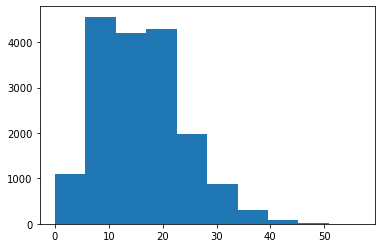

In [133]:
plt.hist(y_num)
plt.show()